# Chapter 1

## The Python Data Model

**Data Model**
- Description of Python as a framework 
- Formalizes the interfaces such as sequesnces , iterators , functions , classes , context manager 

**Method**  
- implementing methods that are called by framework and data model 
- Python interpreter invokes special methods to 
- Python interpreter triggerd by special syntax
- special methods syntax -->  (\__getitem__\)

**Special Method names**

- allows our objects to implement , support , and interact with basic language constructs as such 
        + Iteration
        + Collection 
        + Attribute access
        + Operator Overloading 
        + Function and method invocation
        + Object creation 
        + String representation 
        + Managed contexts (with blocks)
        
  **Note :** All data in a Python program is represented by objects or by relations between objects.
  
  
  

**Magic and Dunder**
- a slang for special method 
- Pronounce it --> (\__getitem__\) --> "dunder-getitem"
- for the upper reason , special methods are also known as dunder method 

# CPython

- Written in C and Python,
- CPython is the default and most widely used implementation of the Python language. 
- can be defined as both an interpreter and a compiler as it compiles Python code into bytecode before interpreting it
- has a foreign function interface with several languages, including C

Python code --> byte code by cpython --> machine readable

**CPython implementation detail:** 

For CPython, id(x) is the memory address where x is stored.

CPython currently uses a reference-counting scheme with (optional) delayed detection of cyclically linked garbage, which collects most objects as soon as they become unreachable, but is not guaranteed to collect garbage containing circular references.

Some objects contain references to “external” resources such as open files or windows. It is understood that these resources are freed when the object is garbage-collected, but since garbage collection is not guaranteed to happen, such objects also provide an explicit way to release the external resource, usually a close() method. Programs are strongly recommended to explicitly close such objects. 

The ‘try…finally’ statement and the ‘with’ statement provide convenient ways to do this.

- Objects whose value can change are said to be mutable
- value is unchangeable once they are created are called immutable
- An object’s mutability is determined by its type; 
- for instance, numbers, strings and tuples are immutable, 
- while dictionaries and lists are mutable.

Some objects contain references to other objects; these are called containers. Examples of containers are tuples, lists and dictionaries. The references are part of a container’s value. In most cases, when we talk about the value of a container, we imply the values, not the identities of the contained objects; however, when we talk about the mutability of a container, only the identities of the immediately contained objects are implied. So, if an immutable container (like a tuple) contains a reference to a mutable object, its value changes if that mutable object is changed.




# A Pythonic Card Deck

*Example 1-1*


In [27]:
import collections

In [28]:
#to construct a simple class to represent individual cards
Card=collections.namedtuple('Card',['rank','suite'])

In [19]:
Card([1,2,3],['a','b','c'])

Card(rank=[1, 2, 3], suite=['a', 'b', 'c'])

In [20]:
type(Card)

type

In [29]:
class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits for rank in self.ranks]
    def __len__(self):
        return len(self._cards)
    def __getitem__(self, position):
        return self._cards[position]

In [30]:
beer_card = Card('7', 'diamonds')

In [13]:
beer_card

Card(rank='7', suite='diamonds')

In [21]:
type(beer_card)

__main__.Card

In [32]:
deck=FrenchDeck()

In [33]:
len(deck)

52

In [16]:
type(deck)

__main__.FrenchDeck

In [17]:
# first card
deck[0]

Card(rank='2', suite='spades')

In [19]:
deck[-1]

Card(rank='A', suite='hearts')

In [22]:
# randomly choosing deck
from random import choice 
choice(deck)

Card(rank='5', suite='spades')

### Two advantages of using special method

+ The users of your classes don’t have to memorize arbitrary method names for standard operations (“How to get the number of items? Is it .size(), .length(), or what?”).

+ It’s easier to benefit from the rich Python standard library and avoid reinventing the wheel, like the random.choice function.

In [23]:
#top 3 cards
deck[:3]

[Card(rank='2', suite='spades'),
 Card(rank='3', suite='spades'),
 Card(rank='4', suite='spades')]

In [25]:
#picking first card at 12 and then picking cards at 13 interval 
deck[12::13]

[Card(rank='A', suite='spades'),
 Card(rank='A', suite='diamonds'),
 Card(rank='A', suite='clubs'),
 Card(rank='A', suite='hearts')]

In [28]:
for x in deck:
    print(x)

Card(rank='2', suite='spades')
Card(rank='3', suite='spades')
Card(rank='4', suite='spades')
Card(rank='5', suite='spades')
Card(rank='6', suite='spades')
Card(rank='7', suite='spades')
Card(rank='8', suite='spades')
Card(rank='9', suite='spades')
Card(rank='10', suite='spades')
Card(rank='J', suite='spades')
Card(rank='Q', suite='spades')
Card(rank='K', suite='spades')
Card(rank='A', suite='spades')
Card(rank='2', suite='diamonds')
Card(rank='3', suite='diamonds')
Card(rank='4', suite='diamonds')
Card(rank='5', suite='diamonds')
Card(rank='6', suite='diamonds')
Card(rank='7', suite='diamonds')
Card(rank='8', suite='diamonds')
Card(rank='9', suite='diamonds')
Card(rank='10', suite='diamonds')
Card(rank='J', suite='diamonds')
Card(rank='Q', suite='diamonds')
Card(rank='K', suite='diamonds')
Card(rank='A', suite='diamonds')
Card(rank='2', suite='clubs')
Card(rank='3', suite='clubs')
Card(rank='4', suite='clubs')
Card(rank='5', suite='clubs')
Card(rank='6', suite='clubs')
Card(rank='7', s

In [30]:
deck[13]

Card(rank='2', suite='diamonds')

In [32]:
deck[::13] #checking how [::] works 

[Card(rank='2', suite='spades'),
 Card(rank='2', suite='diamonds'),
 Card(rank='2', suite='clubs'),
 Card(rank='2', suite='hearts')]

In [36]:
# reversing the cards and then printing
for x in reversed(deck): # doctest: +ELLIPSIS
    print(x)

Card(rank='A', suite='hearts')
Card(rank='K', suite='hearts')
Card(rank='Q', suite='hearts')
Card(rank='J', suite='hearts')
Card(rank='10', suite='hearts')
Card(rank='9', suite='hearts')
Card(rank='8', suite='hearts')
Card(rank='7', suite='hearts')
Card(rank='6', suite='hearts')
Card(rank='5', suite='hearts')
Card(rank='4', suite='hearts')
Card(rank='3', suite='hearts')
Card(rank='2', suite='hearts')
Card(rank='A', suite='clubs')
Card(rank='K', suite='clubs')
Card(rank='Q', suite='clubs')
Card(rank='J', suite='clubs')
Card(rank='10', suite='clubs')
Card(rank='9', suite='clubs')
Card(rank='8', suite='clubs')
Card(rank='7', suite='clubs')
Card(rank='6', suite='clubs')
Card(rank='5', suite='clubs')
Card(rank='4', suite='clubs')
Card(rank='3', suite='clubs')
Card(rank='2', suite='clubs')
Card(rank='A', suite='diamonds')
Card(rank='K', suite='diamonds')
Card(rank='Q', suite='diamonds')
Card(rank='J', suite='diamonds')
Card(rank='10', suite='diamonds')
Card(rank='9', suite='diamonds')
Card(r

# Ellipsis in doctests

*1. When the output was too long, the elided part is marked by an ellipsis* *(...) like in the last line in the preceding code.*

*2. In such cases, we used the #doctest: +ELLIPSIS directive to make the* *doctest pass.*

Iteration is often implicit. If a collection has no __contains__ method, the in operatordoes a sequential scan.

Case in point: in works with our FrenchDeck class because it is iterable.

In [34]:
Card('Q','hearts') in deck

True

In [35]:
Card('Q','beasts') in deck

False

# Sorting

+ By rank (Ace is the highest)
+ By suite in order of spades (highest)
+ then hearts, diamonds and clubs

Here is a function that ranks cards by that rule, returning 0 for the 2 of clubs
and 51 for the ace of spades:

In [37]:
suite_values=dict(spades=3,hearts=2,diamonds=1,clubs=0)

In [39]:
def spades_high(card):
    rank_value=FrenchDeck.ranks.index(card.rank)
    return rank_value * len(suite_values) + suite_values[card.suite]

In [40]:
# deck is an object for FrenchDeck class
#sorted(iterable, key=len) --> iterable = list
for card in sorted(deck,key=spades_high):
    print(card)

Card(rank='2', suite='clubs')
Card(rank='2', suite='diamonds')
Card(rank='2', suite='hearts')
Card(rank='2', suite='spades')
Card(rank='3', suite='clubs')
Card(rank='3', suite='diamonds')
Card(rank='3', suite='hearts')
Card(rank='3', suite='spades')
Card(rank='4', suite='clubs')
Card(rank='4', suite='diamonds')
Card(rank='4', suite='hearts')
Card(rank='4', suite='spades')
Card(rank='5', suite='clubs')
Card(rank='5', suite='diamonds')
Card(rank='5', suite='hearts')
Card(rank='5', suite='spades')
Card(rank='6', suite='clubs')
Card(rank='6', suite='diamonds')
Card(rank='6', suite='hearts')
Card(rank='6', suite='spades')
Card(rank='7', suite='clubs')
Card(rank='7', suite='diamonds')
Card(rank='7', suite='hearts')
Card(rank='7', suite='spades')
Card(rank='8', suite='clubs')
Card(rank='8', suite='diamonds')
Card(rank='8', suite='hearts')
Card(rank='8', suite='spades')
Card(rank='9', suite='clubs')
Card(rank='9', suite='diamonds')
Card(rank='9', suite='hearts')
Card(rank='9', suite='spades')


# FrenchDeck () class
+ Although FrenchDeck implicitly inherits from object,4 its functionality is not inherited,
but comes from leveraging the data model and composition.

+ By implementing the special methods __len__ and __getitem__, our FrenchDeck behaves like a standard Python sequence, allowing it to benefit from core language features (e.g., iteration and slicing)

+ For __len__ and __getitem__ implementations, list object self._cards takes all the work away.

# Can we Shuffle?

+ As implemented so far, a FrenchDeck cannot be shuffled, because it is immutable: the cards and their positions cannot be changed, except by violating encapsulation and handling the _cards attribute directly.

+ In Chapter 11, that will be fixed byadding a one-line __setitem__ method.

# How Special Methods are used ?

> *special methods - they are meant to be called by the*
*Python interpreter, and not by us*

*How Python interpreter calls special method in general?*

+ We don’t write my_object.\__len__\().We write len(my_object) and, if my_object is an instance of a user-defined class, then Python calls the __len__ instance method we implemented.

*How Python interpreter calls special method for list,str,bytearray?*

+ In this case , the interpreter takes a shortcut : the CPython implementation of len() actually returns the ob_size field in the PyVarObject C struct that represents any variable-sized built-in object in memory. This is much faster than calling a method

*Special method call in implicit*

+ For example, the statement for i in x: actually causes the invocation of iter(x), which in turn may call x.\__iter__\() if that is available.

>*Metaprogramming* --> Programs typically read input data, operate on that data and give some output data. Metaprograms read another program, manipulate that program and return a modified program. Sometimes a metaprogram can change its own behaviour by updating itself.

*when you should or shouldn't call special method ?*

- Normally, your code should not have many direct calls to special methods. Unless you are doing a lot of metaprogramming, you should be implementing special methods more often than invoking them explicitly.

- The only special method that is frequently called by user code directly is __init__, to invoke the initializer of the superclass in your own __init__ implementation.

*How to invoke special method?*

- it is usually better to call the related built-in function (e.g., len, iter, str, etc).
- These built-ins call the corresponding special method,but often provide other services and—for built-in types—are faster than method calls.  
- Avoid creating arbitrary, custom attributes with the __foo__ syntax because such names may acquire special meanings in the future, even if they are unused today.

# Emulating Numeric Types

- Several special methods allow user objects to respond to operators such as +.


In [11]:
# Vector Example 
# hypot -->  sqrt(x1*x1 + x2*x2 +x3*x3 .... xn*xn).
from math import hypot
class Vector:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    def __repr__(self):
        return 'Vector(%r, %r)' % (self.x, self.y)
    def __abs__(self):
        return hypot(self.x, self.y)
    def __bool__(self):
        return bool(abs(self))
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)


In [12]:
v1=Vector(2,4)

In [13]:
v2=Vector(2,1)

In [14]:
v1+v2

Vector(4, 5)

In [15]:
# calculating magnitude of a vector 

v=Vector(3,4)
abs(v)

5.0

### scaler operation

We can also implement the * operator to perform scalar multiplication (i.e., multiplyinga vector by a number to produce a new vector with the same direction and a multiplied magnitude)

In [16]:
v * 3

Vector(9, 12)

In [17]:
abs(v * 3)

15.0

# String Reperesntation

## 1. __repr__

- special method is called by the repr built-in to get the string representation of the object for inspection.  
- If we did not implement __repr__, vector instances would be shown in the console like <Vector object at 0x10e100070>.

### When __repr__ is called ?

- The interactive console and debugger call repr on the results of the expressions evaluated,as does the %r placeholder in classic formatting with the % operator, and the !r conversion field in the new Format String Syntax used in the str.format method.



# Difference between __str__ and __repr__ in Python ?

Container’s \__str__\ uses contained objects’ \__repr__\. So if I change \__repr__\ , \__str__\ can obatain that. But if I modify \__str__\ , \__repr__\ cant obtain it.

(\__str__\) :

- To get called by built-int str() method to return a string representation of a type. 


(\__repr__\) :

- To get called by built-int repr() method to return a machine readable representation of a type.
- goal is to be unambigous and machine readable 

When no custom \__str__\ is available , Python will call \__repr__\ as fallback


In [18]:
# * Example of repr and str *

import datetime
today = datetime.datetime.now()
  
# Prints readable format for date-time object
print (str(today))
  
# prints the official format of date-time object
print (repr(today)) 

2022-08-21 15:48:41.817066
datetime.datetime(2022, 8, 21, 15, 48, 41, 817066)


In [19]:
s = 'Hello, Geeks.'
print (repr(s))
print(str(s))

'Hello, Geeks.'
Hello, Geeks.


# Arithmatic Operators

- (+) = (\__add__\)  
- (*) = (\__mul__\)

- The methods create and return a new instance of Vector and do not modify the either operand--self or other are merely read. This is the expected behaiviour of 

>An infix operator is a function of two arguments, with the name of the function written between the arguments. For example, the subtraction operator - is an infix operator. 

- This is the expected behavior of infix operators: to create new objects and not touch their operands.

*Note* : From above example, We can multiply Vector with scaler , but can't multiply scaler with Vector 


# Boolean Value of a Custome Type 

Normally - bool(x) result: True or False

+ instances of user defined classes are consideres Truth , unless either (\__bool__\) or (\__len__\) is implemented. 

+ bool(x) calls x.(\__bool__()\) and displays the result

+ If can't implement (\__bool__()\), Python tries to invoke x.(\__len__()\)

+ If (\__bool__\) and (\__len__\) results 0 , bool returns False
+ (\__bool__\) returns False , if the magnitude of the vector is zero and returns True otherwise

*Note*: For strings, the bool() method returns True until an unless it’s len() is equal to zero(0).


In [1]:
class Vec:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    def __bool__(self):
        return bool(self.x or self.y)

The explicit conversion to bool is
needed because __bool__ must return a boolean and or returns
either operand as is: x or y evaluates to x if that is truthy, otherwise
the result is y, whatever that is.

In [34]:
v4=Vec(3,2)
v5=Vec(3,2)

In [39]:
bool((3,2)==(3,2))

True

In [43]:
bool(v4==v5)

False

# Overview of Special Method

### Table 1-1. Special method names (operators excluded)


 1. String/bytes representation --- > (\__repr__\,\__str__\, \__format__\,\__bytes__\)

 2. Conversion to number ------------> (\__abs__\, \__bool__\, \__complex__\, \__int__\, \__float__\, \__hash__\,\__index__\)
 
 3. Emulating collections -----------> (\__len__\, \__getitem__\, \__setitem__\, \__delitem__\, \__contains__\)
 4. Iteration ------------------------>(\__iter__\, \__reversed__\, \__next__\
 5. Emulating callables --------------> (\__call__\)
 6. Context management  --------------> (\__enter__\, \__exit__\)
 7. Instance creation and destruction ->(\__new__\, \__init__\, \__del__\)
 8. Attribute management --------------->(\__getattr__\, \__getattribute__\, \__setattr__\, \__delattr__\, \__dir__\)
 9. Attribute descriptors ---------------> (\__get__\,\ __set__\, \__delete__\)
 10. Class services---------------------->  (\__prepare__\, \__instancecheck__\, \__subclasscheck__\)

### Table 1-2. Special method names for operators

*Category Method names and related operators*

Unary numeric operators --------- >  __neg__ -, __pos__ +, __abs__ abs()

Rich comparison operators--------- > __lt__ >, __le__ <=, __eq__ ==, __ne__ !=, __gt__ >, __ge__ >=

Arithmetic operators--------------->  __add__ +, __sub__ -, __mul__ *, __truediv__ /, __floordiv__ //, __mod__
%, __divmod__ divmod() , __pow__ ** or pow(), __round__ round()

Reversed arithmetic operators-------> __radd__, __rsub__, __rmul__, __rtruediv__, __rfloordiv__, __rmod__,
__rdivmod__, __rpow__

Augmented assignment 
arithmetic operators----------------->__iadd__, __isub__, __imul__, __itruediv__, __ifloordiv__, __imod__,__ipow__

Bitwise operators--------------------> __invert__ ~, __lshift__ <<, __rshift__ >>, __and__ &, __or__ |,__xor__ ^

# Why len is not a method 

The result of len(x) and x.\__len__\() is the same: both return the number of elements in the object more genrally its length 

When we call len(x) built-in-function , it calls \__len__\() method internally to implement the correct behaviour 

- for built-in types, a call such as len(obj) does not invoke obj.\__len__\(). If the type of obj is a variable length built-in type coded in C, its memory representation has a struct named PyVarObject with an ob_size field. 

- In that case, len(obj) just returns the value of the ob_size field, avoiding an expensive dynamic attribute lookup and method call. Only if obj is a user defined type, then len() will call the __len__() special method, as a fallback.

We can think abs and len as unary operators. Their functional looks and feel , as opposed to method call syntax can lead us to expect Object Oriented language.

### Operator \ # \

- was equivalent to len
- if written x#s , would result s.count(x) : means how many x are in s String


In [5]:
s="fxhx"
x='x'
s.count(x)

2

# Chapter summary

From Book -

- **Special Mehod** : By implementing special methods, our objects can behave like the built-in types, enabling the expressive coding style the community considers Pythonic.

- **String Represntation** : 
        - A basic requirement is to provide usable string represntation
        - usable string represntation - 
            i) one used for debugging and logging (\__repr__\) 
            ii) another for presentation to end users (\__str__\)
            iii) Python offers rich selection of numeric types , from the built-ins to decimal.Decimal and fractions.Fraction. ( they all support infix arithmatic operator )  
            
        The reason for exisiting (\__repr__\) , (\__str__\) in data model is i) and ii)
        
        
**Note** : **Operator overloading** is a compile-time polymorphism.It is an idea of giving special meaning to an existing operator in C++ without changing its original meaning.
        
  Example:

   int a;
  float b,sum;
  sum=a+b;

Here, variables “a” and “b” are of types “int” and “float”, which are built-in data types. Hence the addition operator ‘+’ can easily add the contents of “a” and “b”. This is because the addition operator “+” is predefined to add variables of built-in data type only.


# Some reading links :

1. [“Data Model” chapter of The Python Language Reference](https://docs.python.org/3/reference/datamodel.html)
2. [Python in a Nutshell, 2nd Edition (O’Reilly) by Alex Martelli has](bit.ly/Python-IAN)
3. Python Essential Reference, 4th Edition (Addison-Wesley Professional),
4. Python Cookbook, 3rd Edition (O’Reilly), coauthored with Brian K. Jones.
5. The Art of the Metaobject Protocol (AMOP, MIT Press) by Gregor Kiczales,


# SoapBox

### Data Model or Object Model 

 Some might call Python data model or  Python object model 
 
### Magic Methods 

the special methods are called magic methods by some 

### Metaobjects ( need more research )

Book : The Art of Metaobject Protocol (AMOP)

- refers to the object that are the building blocks of a language itself


# Chapter 2 
## An Array of Sequences

### ABC

- Before creating Python , Guido was a contributor to the ABC language 
- ABC introduced many ideas we now consider 'Pythonic'
   - generic operations on sequences 
   - built in tuple and mapping types 
   - structure by indentation 
   - strong typing without variable declaration
        
**Note :** Python was inherited from ABC

Some Rich set of common operations are including -
    - iteration, 
    - slicing, 
    - sorting and 
    - concatenation

**Strings, lists, byte , sequences, arrays, XML elements, and database** results share these rich set of common operations.

The reason we need to understand the variety of sequences available in Python
 - is to save us from reinventing the wheel 
 - their common interface could inspire us to create APIs that properly support and leverage existing and future sequence types

### Overview of Built-In Sequences

standard library offers a rich selection of sequence types implemented in C

These sequence types are -

- Container sequences
    - Definition : Container sequences hold references to the objects they contain, which may be of any type
    - list, tuple, and collections.deque can hold items of diffrent types
    - holds reference to the object they contain and the object could be of any type 
    
        **List :**
        a=[1,2,3,4]

        **Tuple :**
        a= (year,month,date)
        
        **collections.deque :**
        A deque is a double-ended queue. It can be used to add or remove elements from both ends.
       
       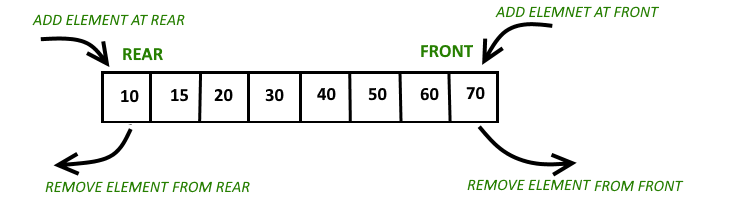
            Fig : Deque algorithm

- Flat sequences
    - str, bytes, bytearray, memoryview, and array.array hold items of different types
    - physically store the value of each item within its own memory space, and not as distinct objects
    - That's why they are more compact
    - but they are limited to holding primitive values like characters, bytes, and numbers
    
         **Bytes :**
           bytes() function:
            Return a new "bytes" object, which is an immutable sequence of small integers in the range 0 <= x < 256, print as ASCII characters when displayed. bytes is an immutable version of bytearray – it has the same non-mutating methods and the same indexing and slicing behavior.
             
       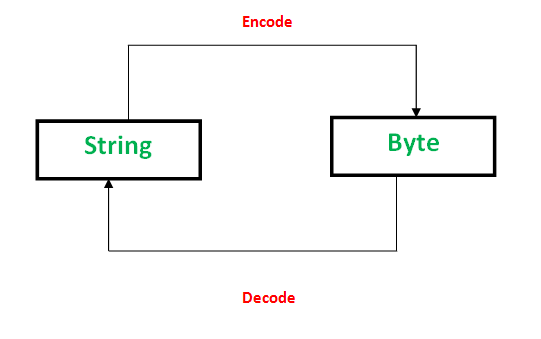
       
       **Byte Array :**
         bytearray() method :  returns a bytearray object which is an array of the given bytes.

         
         
     
       
    
 

In [2]:
from collections import deque
     
# Declaring deque
queue = deque(['name','age','DOB']) 
     
print(queue)

deque(['name', 'age', 'DOB'])


In [3]:
# Python code to demonstrate String encoding

# initialising a String
#byte exmaple
a = 'GeeksforGeeks'

# initialising a byte object
c = b'GeeksforGeeks'

# using encode() to encode the String
# encoded version of a is stored in d
# using ASCII mapping
d = a.encode('ASCII')

# checking if a is converted to bytes or not
if (d==c):
	print ("Encoding successful")
else : print ("Encoding Unsuccessful")


Encoding successful


In [4]:
# bytearray
prime_numbers = [2, 3, 5, 7]
# convert list to bytearray
byte_array = bytearray(prime_numbers)
print(byte_array)

bytearray(b'\x02\x03\x05\x07')


In [5]:
#bytearray

string = "Python is interesting."

# string with encoding 'utf-8'
arr = bytearray(string, 'utf-8')
print(arr)

bytearray(b'Python is interesting.')


### Overview of Built-In Sequences

Another way of grouping sequence type is by mutability 

**Mutable Sequence** : 
list, bytearray, array.array, collections.deque, and memoryview

**Immutable sequences**:
tuple, str, and bytes

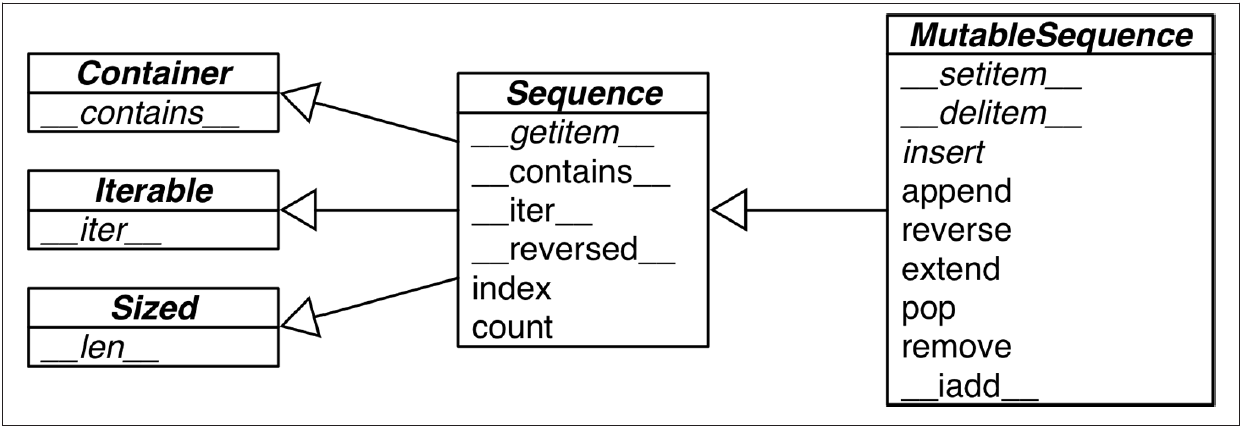

Fig : UML class diagram for some classes from collections.abc (superclasses are
on the left; inheritance arrows point from subclasses to superclasses; names in italic are
abstract classes and abstract methods

list comprehensions - a powerful way of building lists that is somewhat underused because the syntax may be
unfamiliar.



### List Comprehensions and Generator Expressions

### List Comprehensions and Readability



Example 2-1. Build a list of Unicode codepoints from a string

In [6]:
symbols = '$¢£¥€¤'
codes = []
for symbol in symbols:
    codes.append(ord(symbol))
print(codes)

[36, 162, 163, 165, 8364, 164]


Example 2-2. Build a list of Unicode codepoints from a string, take two

In [7]:
symbols = '$¢£¥€¤'
codes=[ord(symbol) for symbol in symbols]
print(codes)

[36, 162, 163, 165, 8364, 164]


**for loop is used**
- scanning a sequence to count or pick items
- computing aggregates (sums, averages)
- any number of other processing tasks

**list comp**
- to build a new list 

### Listcomps No Longer Leak Their Variables

**Syntax :**
- line breaks are ignored inside pairs of [], {}, or ()

In [15]:
# Python 2.7.6
x = 'my precious'
dummy = [x for x in 'ABC']


In [16]:
# Python 2.7.6 , supposed to print 'C'
x  

'my precious'

In [17]:
# Python 3
x = 'ABC'
dummy = [ord(x) for x in x]


In [18]:
x

'ABC'

In [19]:
dummy

[65, 66, 67]

### Conclusion of above comparison of the code
- The value of x is preserved.
- The list comprehension produces the expected list

### Listcomps Versus map and filter

Listcomps do everything the map and filter functions do, without the contortions of the functionally challenged Python lambda

Example 2-3. The same list built by a listcomp and a map/filter composition

In [20]:
symbols = '$¢£¥€¤'
beyond_ascii = [ord(s) for s in symbols if ord(s) > 127]
beyond_ascii

[162, 163, 165, 8364, 164]


**lambda function**

- A lambda function is a small anonymous function.
- A lambda function can take any number of arguments, but can only have one expression.

**Syntax**

lambda arguments : expression


In [21]:
x = lambda a : a + 10
print(x(5))

15


In [22]:
s= lambda s : s + 'thi'
print(s('pri'))

prithi


**lambda**

The power of lambda is better shown when you use them as an anonymous function inside another function.

Say you have a function definition that takes one argument, and that argument will be multiplied with an unknown number:

In [24]:
def myfunc(n):
  return lambda a : a * n

mydoubler = myfunc(2)

print(mydoubler(11))


22


**map**
- The map() function executes a specified function for each item in an iterable. 
- The item is sent to the function as a parameter.

**syntax**

map(function, iterables)


In [26]:
def myfunc(a):
  return len(a)

x = map(myfunc, ('apple', 'banana', 'cherry'))

print(x)

#convert the map into a list, for readability:
print(list(x))


[5, 6, 6]


**filter**

- The filter() method filters the given sequence with the help of a function that tests each element in the sequence to be true or not.

**filter syntax**

filter(function, sequence)

Example 2-3. The same list built by a listcomp and a map/filter composition

In [28]:
symbols = '$¢£¥€¤'
beyond_ascii= list(filter(lambda a: a > 127,map(ord,symbols)))
beyond_ascii

[162, 163, 165, 8364, 164]

In [30]:
# see which one is faster 
import timeit

TIMES = 10000

SETUP = """
symbols = '$¢£¥€¤'
def non_ascii(c):
    return c > 127
"""

def clock(label, cmd):
    res = timeit.repeat(cmd, setup=SETUP, number=TIMES)
    print(label, *('{:.3f}'.format(x) for x in res))

clock('listcomp        :', '[ord(s) for s in symbols if ord(s) > 127]')
clock('listcomp + func :', '[ord(s) for s in symbols if non_ascii(ord(s))]')
clock('filter + lambda :', 'list(filter(lambda c: c > 127, map(ord, symbols)))')
clock('filter + func   :', 'list(filter(non_ascii, map(ord, symbols)))')

listcomp        : 0.021 0.018 0.013 0.011 0.010
listcomp + func : 0.019 0.016 0.015 0.013 0.016
filter + lambda : 0.016 0.013 0.012 0.012 0.011
filter + func   : 0.011 0.012 0.011 0.012 0.012


# Cartesian Products

- Listcomps can generate lists from the Cartesian product of two or more iterables

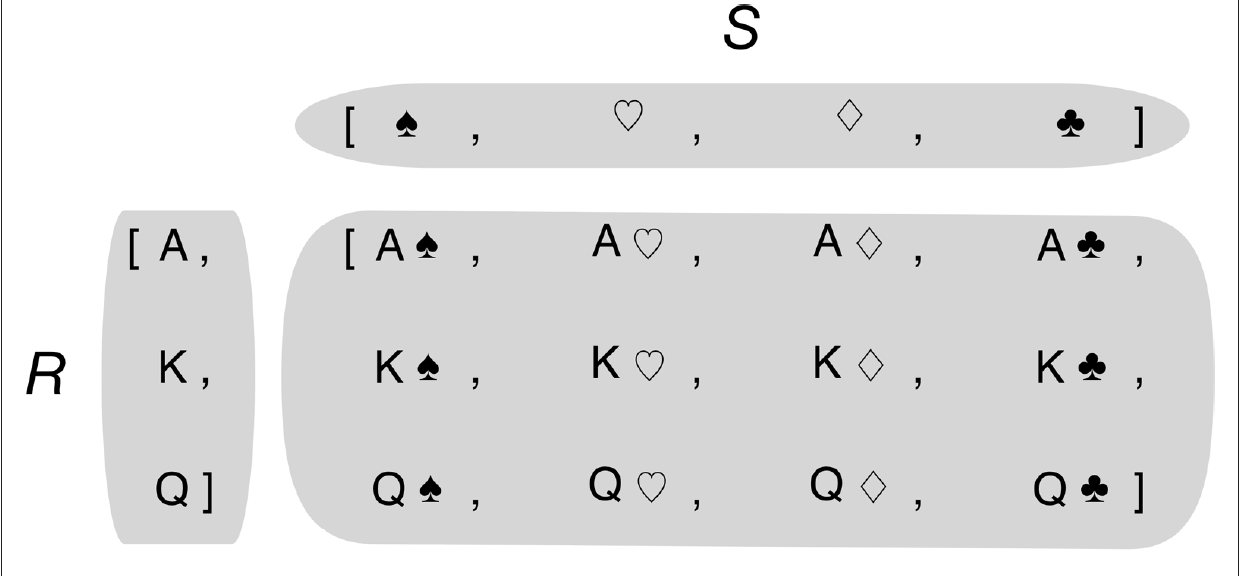

Example 2-4. Cartesian product using a list comprehension


In [35]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

In [36]:
for color in colors:
    for size in sizes:
        print((color, size))

('black', 'S')
('black', 'M')
('black', 'L')
('white', 'S')
('white', 'M')
('white', 'L')


In [37]:
tshirts = [(color, size) for size in sizes
  for color in colors]

In [38]:
tshirts


[('black', 'S'),
 ('white', 'S'),
 ('black', 'M'),
 ('white', 'M'),
 ('black', 'L'),
 ('white', 'L')]

### generator expression

- To initialize **tuples, arrays, and other types of sequences**, you could also start from a listcomp, but a genexp saves memory because it yields items one by one using the iterator protocol instead of building a whole list just to feed another constructor.
- An iterator protocol is nothing but a specific class in Python which further has the __next()__ method.
- Initializing a tuple and an array from a generator expression

In [46]:
symbols='$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [47]:
import array
array.array('I',(ord(symbol) for symbol in symbols))

array('I', [36, 162, 163, 165, 8364, 164])

Example 2-6 uses a genexp with a Cartesian product to print out a roster of T-shirts of
two colors in three sizes.

If the two lists used in the Cartesian product had 1,000 items each, using
a generator expression would save the expense of building a list with a million items
just to feed the for loop.

Example 2-6. Cartesian product in a generator expression


In [48]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
# print "this is a tuple: %s" % (thetuple,)
for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


In [55]:
( '%s %s' % (c, s) for c in colors for s in sizes)

 

<generator object <genexpr> at 0x000001D9F6638848>

The generator expression yields items one by one; a list with all six T-shirt
variations is never produced in this example.

### Tuples Are Not Just Immutable Lists

- Some introductory texts about Python present tuples as “immutable lists,” but that is short selling them.
- double duty of tupples are 
    - they can be used as immutable lists
    - they can be used as records with no field names.
    
### Tuples as Records 



In [56]:
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32450, 0.66, 8014)
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'),
                ('ESP', 'XDA205856')]
# unpacking tuple
for passport in sorted(traveler_ids):
    print('%s/%s' % passport)
    

BRA/CE342567
ESP/XDA205856
USA/31195855


In [57]:
# unpacking tuple 
for country, _ in traveler_ids:
    print(country)

USA
BRA
ESP


The for loop knows how to retrieve the items of a tuple separately—this is called
“unpacking.” Here we are not interested in the second item, so it’s assigned to
_, a dummy variable.

### Tuple Unpacking

- works with any iterable object 
- 


In [58]:
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates # tuple unpacking
latitude


33.9425

In [59]:
longitude
 

-118.408056

In [61]:
 divmod(20, 8)

(2, 4)

In [62]:
t = (20, 8)
divmod(*t)

(2, 4)

In [64]:
quotient, remainder = divmod(*t)

In [65]:
quotient, remainder

(2, 4)

**"_"**

- Sometimes when we only care about certain parts of a tuple when unpacking, a dummy variable like _ is used as placeholder
- If you write internationalized software, _ is not a good dummy variable because it is traditionally used as an alias to the get text.gettext function, as recommended in the gettext module documentation.
- Another way of focusing on just some of the items when unpacking a tuple is to use the
*, as we’ll see right away.

### Using * to grab excess items

Defining function parameters with *args to grab arbitrary excess arguments is a classic Python feature.



In [66]:
a, b, *rest = range(5)

In [67]:
a, b, rest

(0, 1, [2, 3, 4])

In [70]:
z,*c=  range(5)

In [73]:
z,c

(0, [1, 2, 3, 4])

In [74]:
a, b, *rest = range(3)

In [75]:
a,b,rest

(0, 1, [2])

In [76]:
a, b, *rest = range(2)

In [77]:
a,b,rest

(0, 1, [])

In the context of parallel assignment, the * prefix can be applied to exactly one variable,
but it can appear in any position:

In [78]:
a, *body, c, d = range(5)

In [79]:
a,body,c,d

(0, [1, 2], 3, 4)

In [80]:
*head, b, c, d = range(5)

In [81]:
head, b, c, d

([0, 1], 2, 3, 4)

### Nested Tuple Unpacking 

- a powerful feature of tuple unpacking is that it works with nested structures.

Example 2-8. Unpacking nested tuples to access the longitude

In [93]:
print('{:15} | {:^9} | {:^9}'.format(' ', 'lat.', 'long.'))

                |   lat.    |   long.  


**.format**

- {:} -----   Use a space to insert an extra space before positive numbers (and a minus sign before negative numbers
- {:^} ------- Center aligns the result (within the available space)

In [98]:
metro_areas = [
('Tokyo', 'JP', 36.933, (35.689722, 139.691667)), 
('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]
print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
fmt = '{:15} | {:9.4f} | {:9.4f}'
for name, cc, pop, (latitude, longitude) in metro_areas: #
    if longitude <= 0: #
        print(fmt.format(name, latitude, longitude))

                |   lat.    |   long.  
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


- Before Python 3, it was possible to define functions with nested tuples in the formal parameters (e.g., def fn(a, (b, c), d):).
- This is no longer supported in Python 3 function definitions, for practical reasons explained in PEP 3113 — Removal of Tuple Parameter Unpacking.
- To be clear: nothing changed from the perspective of users calling a function. The restriction applies only to the definition of functions.

### Named Tuples
- tuples are very handy. But there is a missing feature when using them as records: sometimes it is desirable to name the fields. 
- That is why the namedtuple function was invented
- The collections.namedtuple function is a factory that produces subclasses of tuple enhanced with field names and a class name—which helps debugging.
- Instances of a class that you build with namedtuple take exactly the same amount of memory as tuples because the field names are stored in the class.
- use less emory cause they dont store attributes in a per instance (\__dict__\)


In [99]:
import collections

In [100]:
Card = collections.namedtuple('Card', ['rank', 'suit'])

In [101]:
Card('5','speads')

Card(rank='5', suit='speads')

Example 2-9. Defining and using a named tuple type

In [3]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates')
tokyo = City('Tokyo', 'JP', 36.933, (35.689722, 139.691667))
tokyo

City(name='Tokyo', country='JP', population=36.933, coordinates=(35.689722, 139.691667))

In [4]:
temp=City('Seoul','FP',36.933, (35.689722, 139.691667))
temp

City(name='Seoul', country='FP', population=36.933, coordinates=(35.689722, 139.691667))

In [5]:
tokyo.name


'Tokyo'

In [6]:
tokyo.population

36.933

In [7]:
tokyo.coordinates

(35.689722, 139.691667)

In [8]:
tokyo[1]

'JP'

Example 2-10. Named tuple attributes and methods (continued from the previous example)

In [9]:
City._fields

('name', 'country', 'population', 'coordinates')

In [10]:
LatLong = namedtuple('LatLong', 'lat long')

In [11]:
delhidata=LatLong(35.987,36.678)
delhidata

LatLong(lat=35.987, long=36.678)

In [12]:
delhidata=('Delhi_NCR','IN',21.935,LatLong(28.613889, 77.208889))
delhidata

('Delhi_NCR', 'IN', 21.935, LatLong(lat=28.613889, long=77.208889))

In [13]:
# make() allow you to instantiate a named tuple from an iterable; City(*delhidata) would do the same.
delhi = City._make(delhidata) 

In [14]:
delhi._asdict()

OrderedDict([('name', 'Delhi_NCR'),
             ('country', 'IN'),
             ('population', 21.935),
             ('coordinates', LatLong(lat=28.613889, long=77.208889))])

In [16]:
type(delhi._asdict())

collections.OrderedDict

In [15]:
for key , value in delhi._asdict().items():
    print(key+':',value)

name: Delhi_NCR
country: IN
population: 21.935
coordinates: LatLong(lat=28.613889, long=77.208889)


### Conclusion from above code

- fields is a tuple with the field names of the class.

- _make() allows to instantiate a named tuple from an iterable; City(*delhi_data) would do the same.

- _asdict() returns a collections.OrderedDict built from the named tuple instance. That can be used to produce a nice display of city data.

**This is the power of tuples as records, we can consider their second role as an immutable variant of the list type.**

### Tuples as Immutable Lists

- tuple supports all list methods that do not involve adding or removing items,

- with one exception—tuple lacks the __reversed__ method.
- that is just for optimization; reversed(my_tuple) works without it.

Table 2-1. Methods and attributes found in list or tuple (methods implemented by object
are omitted for brevity)

**------------------------------ list tuple -----------------------**

s.__add__(s2) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s + s2—concatenation

s.__iadd__(s2) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s += s2—in-place concatenation

s.append(e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Append one element after last

s.clear() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Delete all items

s.__contains__(e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; e in s

s.copy() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Shallow copy of the list

s.count(e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Count occurrences of an element

s.__delitem__(p) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Remove item at position p

s.extend(it) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Append items from iterable it

s.__getitem__(p) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp;  s[p]—get item at position

s.__getnewargs__() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Support for optimized serialization with pickle

s.index(e) &nbsp; &nbsp; **>>>>>>> >>>>>>>>>>>>>** &nbsp;&nbsp;  Find position of first occurrence of e

s.insert(p, e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp;  Insert element e before the item at position p

s.__iter__() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Get iterator

s.__len__() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; len(s)—number of items

s.__mul__(n) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s * n—repeated concatenation

s.__imul__(n) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s *= n—in-place repeated concatenation

s.__rmul__(n) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; n * s—reversed repeated concatenationa

s.pop([p]) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp;Remove and return last item or item at optional position p

s.remove(e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Remove first occurrence of element e by value

s.reverse() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Reverse the order of the items in place

s.__reversed__() &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Get iterator to scan items from last to first

s.__setitem__(p, e) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; s[p] = e—put e in position p, overwriting existing item

s.sort([key], [reverse]) &nbsp; &nbsp; **>>>>>>>>>>>>>>>>>>>>** &nbsp;&nbsp; Sort items in place with optional keyword arguments key and reverse


**Every Python programmer knows that sequences can be sliced using the s[a:b] syntax.
We now turn to some less well-known facts about slicing.**

### Slicing

- A common feature of list, tuple, str, and all sequence types in Python is the support of slicing operations, which are more powerful than most people realize.


### Why Slices and Range Exclude the Last Item

- The Pythonic convention of excluding the last item in slices and ranges works well with the zero-based indexing used in Python, C, and many other languages. 
- Some convenient features of the convention are:
    - It’s easy to see the length of a slice or range when only the stop position is given: range(3) and my_list[:3] both produce three items.
    - It’s easy to compute the length of a slice or range when start and stop are given: just subtract stop - start.
    - It’s easy to split a sequence in two parts at any index x, without overlapping: simply get my_list[:x] and my_list[x:]. For example:

In [17]:
l=[10,20,30,50,60]
l[:2]


[10, 20]

In [18]:
l[2:]

[30, 50, 60]

In [19]:
l[:3]

[10, 20, 30]

In [20]:
l[3:]

[50, 60]

**But the best arguments for this convention were written by the Dutch computer scientist
Edsger W. Dijkstra**

### Slice Objects

- This is no secret, but worth repeating just in case: s[a:b:c] can be used to specify a stride or step c, causing the resulting slice to skip items. 
- The stride can also be negative, returning items in reverse. Three examples make this clear:

In [21]:
s='bicycle'
s[::3]

'bye'

In [22]:
s[::-1]

'elcycib'

In [23]:
s[:-1]

'bicycl'

In [25]:
s[::1]

'bicycle'

In [24]:
s[::-2]

'eccb'

In [34]:
deck[12::13]

[Card(rank='A', suite='spades'),
 Card(rank='A', suite='diamonds'),
 Card(rank='A', suite='clubs'),
 Card(rank='A', suite='hearts')]

- to evaluate the expression seq[start:stop:step], 
- Python callsseq.__getitem__(slice(start, stop, step)).

In [86]:
invoice = """
0.....6.................................40........52...55........
1909  Pimoroni PiBrella                   $17.50     3   $52.50
1489  6mm Tactile Switch x20              $4.95      2   $9.90
1510  Panavise Jr. - PV-201               $28.00     1   $28.00
1601 PiTFT Mini Kit 320x240               $34.95     1   $34.95
"""
SKU=slice(0,6)

In [87]:

SKU

slice(0, 6, None)

In [88]:
DESCRIPTION = slice(6, 40)

In [89]:
UNIT_PRICE = slice(40, 52)

In [90]:
QUANTITY = slice(52, 55)

In [91]:
ITEM_TOTAL = slice(55, None)

In [92]:
line_items = invoice.split('\n')[2:]

In [93]:
line_items

['1909  Pimoroni PiBrella                   $17.50     3   $52.50',
 '1489  6mm Tactile Switch x20              $4.95      2   $9.90',
 '1510  Panavise Jr. - PV-201               $28.00     1   $28.00',
 '1601 PiTFT Mini Kit 320x240               $34.95     1   $34.95',
 '']

In [94]:
for item in line_items:
     print(item[UNIT_PRICE], item[DESCRIPTION])

  $17.50     Pimoroni PiBrella                 
  $4.95      6mm Tactile Switch x20            
  $28.00     Panavise Jr. - PV-201             
  $34.95     iTFT Mini Kit 320x240             
 


 ### Multidimensional Slicing and Ellipsis
 
 - The [] operator can also take multiple indexes or slices separated by commas
 
 - where items of a two-dimensional numpy.ndarray can be fetched using the syntax a[i, j] and a two-dimensional slice obtained with an expression like a[m:n, k:l]
 
 - The __getitem__ and __setitem__ special methods that handle the [] operator simply receive the indices in a[i, j] as a tuple
 
 - In other words, to evaluate a[i, j], Python calls a.__getitem__((i, j)).
 
 - The built-in sequence types in Python are one-dimensional, so they support only one index or slice, and not a tuple of them.

### Assigning to Slices

Mutable sequences can be grafted, excised, and otherwise modified in place using slice notation on the left side of an assignment statement or as the target of a del statement.
The next few examples give an idea of the power of this notation

In [96]:
l = list(range(10))

In [97]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [98]:
l[2:5] = [20, 30]

In [99]:
l

[0, 1, 20, 30, 5, 6, 7, 8, 9]

In [100]:
del l[5:7]

In [101]:
l

[0, 1, 20, 30, 5, 8, 9]

In [102]:
l[3::2] = [11, 22]

In [103]:
l

[0, 1, 20, 11, 5, 22, 9]

In [105]:
l[2:5] = [100]

In [106]:
l

[0, 1, 100, 22, 9]

### Using + and * with Sequences

In [107]:
l=[1,2,3]
l * 5 

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [108]:
5 * 'abcd'

'abcdabcdabcdabcdabcd'

Both + and * always create a new object, and never change their operands.

Beware of expressions like a * n when a is a sequence containing
mutable items because the result may surprising. 

For example,
trying to initialize a list of lists as my_list = [[]] * 3 will
result in a list with three references to the same inner list, which is
probably not what you want


### Building Lists of Lists
Sometimes we need to initialize a list with a certain number of nested lists—for example,
to distribute students in a list of teams or to represent squares on a game board.

Example 2-12. A list with three lists of length 3 can represent a tic-tac-toe board


In [26]:
board = [['_'] * 3 for i in range(3)]
board


[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [27]:
board[1][2] = 'X'
board
 

[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

In [28]:
board [0][0]='X'
board

[['X', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

In [29]:
['_'] * 3

['_', '_', '_']

In [30]:
b=[]
for i in range(3):
    b+=[['_'] * 3]
    print(i,b)

0 [['_', '_', '_']]
1 [['_', '_', '_'], ['_', '_', '_']]
2 [['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]


In [31]:
b

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [32]:
[['_'] * 3 for i in range(3)]

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

A tempting but wrong shortcut is doing it like Example 2-13.

Example 2-13. A list with three references to the same list is useless

In [33]:
weird_board = [['_'] * 3] * 3
weird_board


[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [34]:
weird_board[1][2] = 'O'
weird_board
 

[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]

Placing a mark in row 1, column 2, reveals that all rows are aliases referring to
the same object.

The code earlier this , changed only object in position of [1][2]. But here it ttreats the all the object same 

The problem with Example 2-13 is that, in essence, it behaves like this code:

In [44]:
row = ['_'] * 3
board = []
for i in range(3):
    board.append(row)

In [45]:
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [46]:
board[2][0]='X'
board

[['X', '_', '_'], ['X', '_', '_'], ['X', '_', '_']]

In [52]:
b=[5] +[3] +[10,20]
b

[5, 3, 10, 20]

In [58]:
b=[[5] +[3]] +[10,20]
b

[[5, 3], 10, 20]

In [57]:
b=[[5,6]] * 3
b

[[5, 6], [5, 6], [5, 6]]

So far we have discussed the use of the plain + and * operators with sequences, but there
are also the += and *= operators, which produce very different results depending on the
mutability of the target sequence. The following section explains how that works.

### Augmented Assignment with Sequences

- The augmented assignment operators += and *= behave very differently depending on
the first operand
- we will focus on augmented addition first
(+=), but the concepts also apply to *= and to other augmented assignment operators
- Special Method For this :
    - special method that makes += work is __iadd__ (for “in-place addition”).
- However, if __iadd__ is not implemented, Python falls back to calling __add__.

**What happens (\__iadd__\)**

- If a implements (\__iadd__\), that will be called. In the case of mutable sequences (e.g.,list, bytearray, array.array), a will be changed in place (i.e., the effect will be similar to a.extend(b)). 

- However, when a does not implement (\__iadd__\), the expression a +=
b has the same effect as a = a + b

- In general, for mutable sequences, it is a good bet that (\__iadd__\) is implemented and
that += happens in place. For immutable sequences, clearly there is no way for that to
happen.


In [60]:
a += b

NameError: name 'a' is not defined

In [63]:
l = [1, 2, 3]
id(l)

2824811042568

In [64]:
l += 3

TypeError: 'int' object is not iterable

In [61]:
l *= 2

In [62]:
l

[1, 2, 3, 1, 2, 3]

In [65]:
id(l)

2824811042568

In [66]:
t=(1,2,3)

In [67]:
id(t)

2824810122920

In [68]:
t *= 2

In [69]:
t

(1, 2, 3, 1, 2, 3)

In [70]:
id(t)

2824810089064

Conclusion : 
- After multiplication of the list, the list is the same object, with new items appended
[as the id is the same]

- After multiplication of the tuple , a new tuple was created [as the id is the diff]

**Note: Repeated concatenation of immutable sequences is inefficient, because instead of just
appending new items, the interpreter has to copy the whole target sequence to create a
new one with the new items concatenated.**

### A += Assignment Puzzler

Example 2-14. A riddle

In [73]:
# TypeError is raised with the message 'tuple' object does not support item assignment.
t = (1, 2, [30, 40]) 
t[2]+=[50,60]

TypeError: 'tuple' object does not support item assignment

In [74]:
t

(1, 2, [30, 40, 50, 60])

**after t = (1, 2, [30, 40])  executed the visualisation is :**

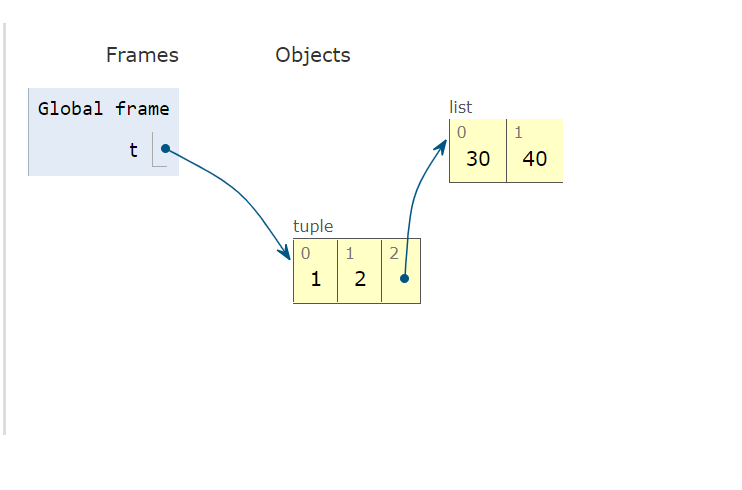


**after t[2]+=[50,60] executed visualisation is**


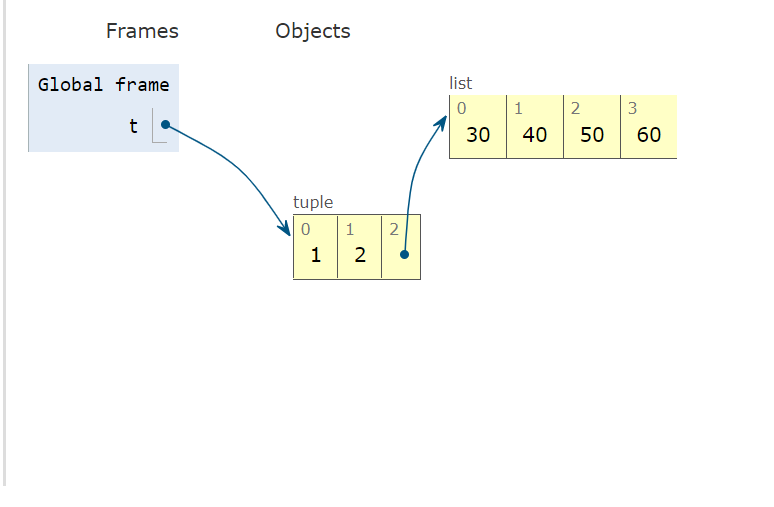

**so the answer is , t will become (1, 2, [30, 40, 50, 60]) and also TypeError is raised with the message 'tuple' object does not support item assignment.**

In [76]:
import dis 
dis.dis('s[a] += b')

  1           0 LOAD_NAME                0 (s)
              2 LOAD_NAME                1 (a)
              4 DUP_TOP_TWO
              6 BINARY_SUBSCR
              8 LOAD_NAME                2 (b)
             10 INPLACE_ADD
             12 ROT_THREE
             14 STORE_SUBSCR
             16 LOAD_CONST               0 (None)
             18 RETURN_VALUE


### Conclusion 

- Put the value of s[a] on TOS (Top Of Stack).
- Perform TOS += b. This succeeds if TOS refers to a mutable object (it’s a list, in
Example 2-15).
- Assign s[a] = TOS. This fails if s is immutable (the t tuple in Example 2-15)

### 3 Lessons :
- Putting mutable items in tuples is not a good idea.Augmented Assignment with Sequences  
- Augmented assignment is not an atomic operation—we just saw it throwing an exception after doing part of its job.
- Inspecting Python bytecode is not too difficult, and is often helpful to see what is going on under the hood. 